In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/titanic.csv", sep=",")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.groupby("Pclass")["Survived"]

<Axes: ylabel='Pclass'>

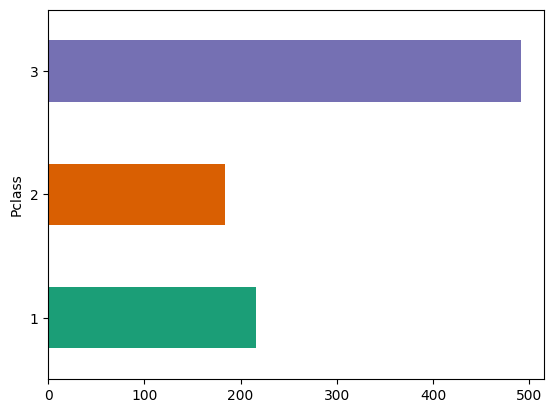

In [7]:
df.groupby('Pclass').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

In [9]:
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [14]:
df.groupby(["Pclass", "Survived"])["Survived"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [18]:
df.groupby(["Pclass", "Survived"]).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

In [20]:
pclass_vs_survived = df.groupby(["Pclass"])["Survived"].value_counts()
pclass_vs_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [31]:
pclass_vs_survived = df.groupby(["Pclass", "Survived"])["Survived"].count()
pclass_vs_survived

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [40]:
survived_count = []
not_survived_count = []

for i in range(1,4):
    ns,s = pclass_vs_survived.loc[i].values
    not_survived_count.append(s)
    survived_count.append(s)
print(not_survived_count)
print(survived_count)

[np.int64(136), np.int64(87), np.int64(119)]
[np.int64(136), np.int64(87), np.int64(119)]


In [43]:
not_survived_count = pclass_vs_survived.values[::2]
not_survived_count

array([ 80,  97, 372])

In [42]:
survived_count = pclass_vs_survived.values[1::2]
survived_count

array([136,  87, 119])

In [44]:
pclass_unique = pclass_vs_survived.index.get_level_values("Pclass")[::2]
pclass_unique

Index([1, 2, 3], dtype='int64', name='Pclass')

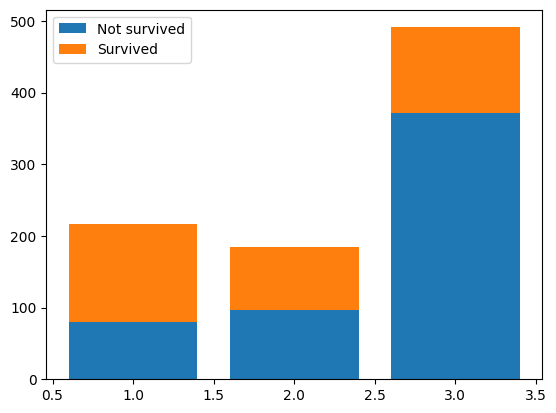

In [49]:
plt.bar(pclass_unique, not_survived_count, label="Not survived")
plt.bar(pclass_unique, bottom=not_survived_count, height=survived_count, label="Survived");
plt.legend();

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


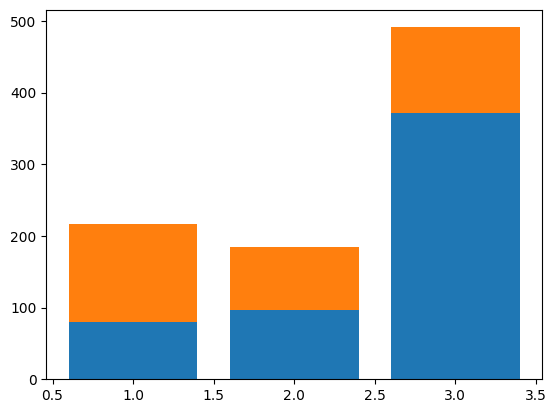

In [51]:
ps = df.groupby(['Survived', 'Pclass'])['Pclass'].count()
print(ps)
not_survived = ps[0]
survived = ps[1]
plt.bar(not_survived.index, not_survived.values)
plt.bar(survived.index, bottom=not_survived.values, height=survived.values);

<Axes: xlabel='Pclass', ylabel='count'>

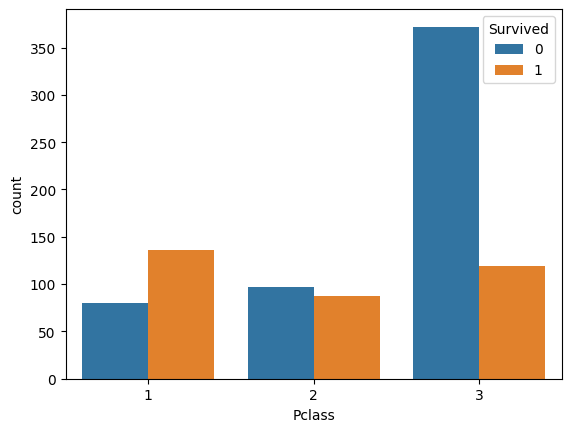

In [8]:
sns.countplot(data=df, x="Pclass", hue="Survived")

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ps = df.groupby(['Survived', 'Pclass'])['Pclass'].count()

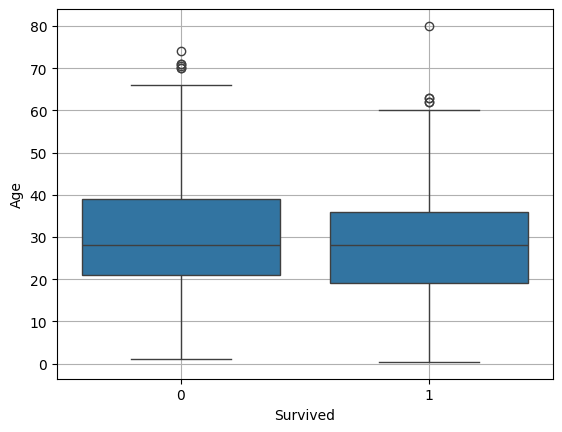

In [55]:
sns.boxplot(data=df, x="Survived", y="Age")
plt.grid();

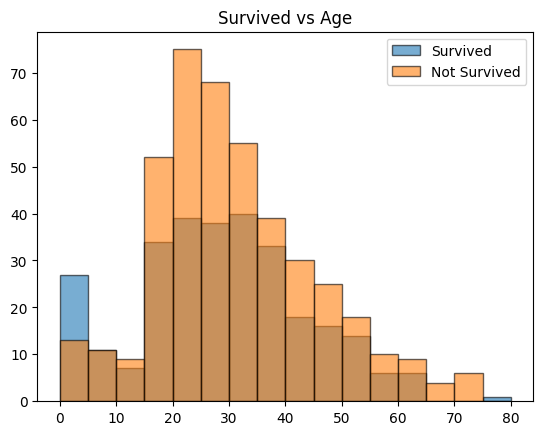

In [62]:
plt.hist(df[df["Survived"]==1]["Age"], alpha=0.6, edgecolor="k", label="Survived", bins=np.arange(0,85,5))
plt.hist(df[df["Survived"]==0]["Age"], alpha=0.6, edgecolor="k", label="Not Survived", bins=np.arange(0,85,5))
plt.title("Survived vs Age");
plt.legend();

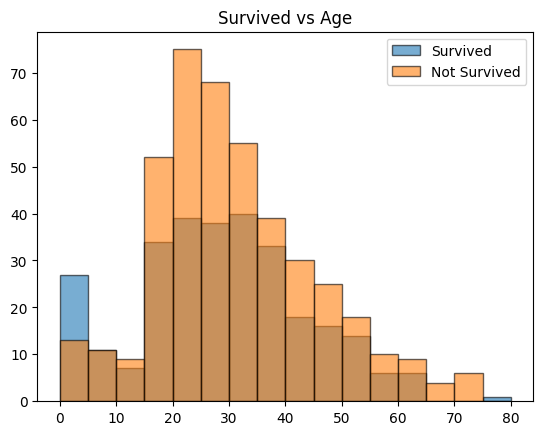

In [64]:
plt.hist(df[df["Survived"]==1]["Age"], alpha=0.6, edgecolor="k", label="Survived", bins=np.arange(0,85,5))
plt.hist(df[df["Survived"]==0]["Age"], alpha=0.6, edgecolor="k", label="Not Survived", bins=np.arange(0,85,5))
plt.title("Survived vs Age");
plt.legend();

### Age vs. Fare

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


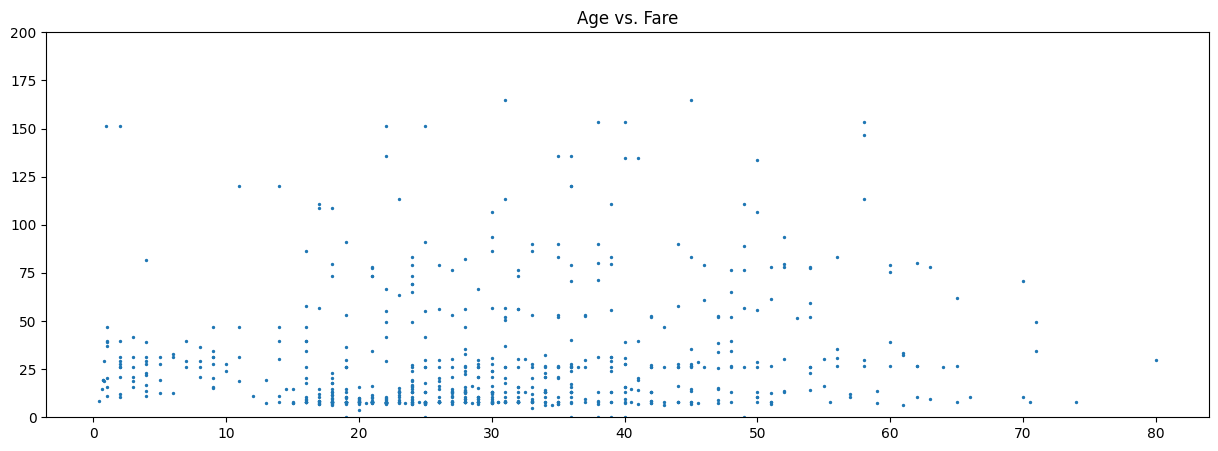

In [73]:
plt.figure(figsize=(15,5))
plt.scatter(df["Age"], df["Fare"], s=2)
plt.ylim(0, 200);
plt.title("Age vs. Fare");

In [ ]:
df["SibSp"]

<Axes: xlabel='SibSp', ylabel='Age'>

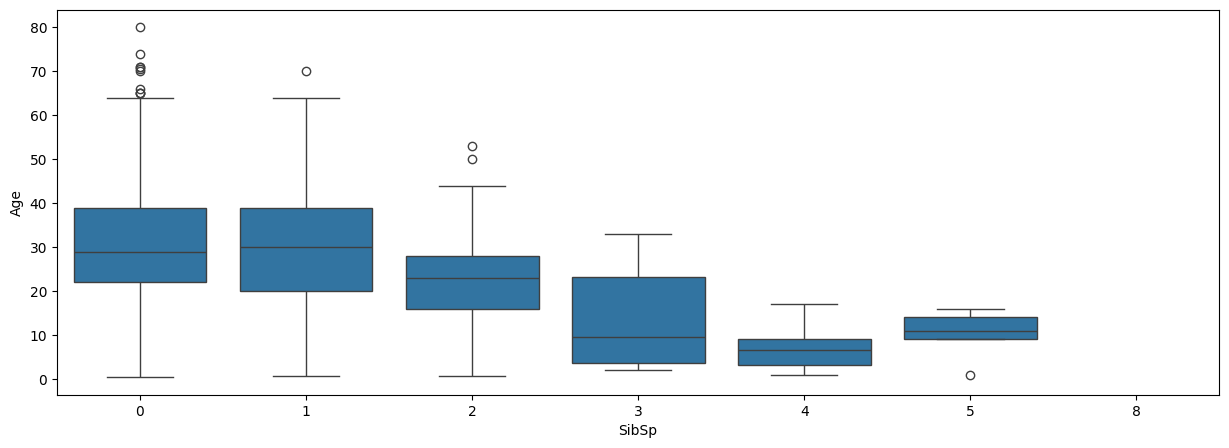

In [76]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x="SibSp", y="Age")

<Axes: xlabel='Parch', ylabel='Age'>

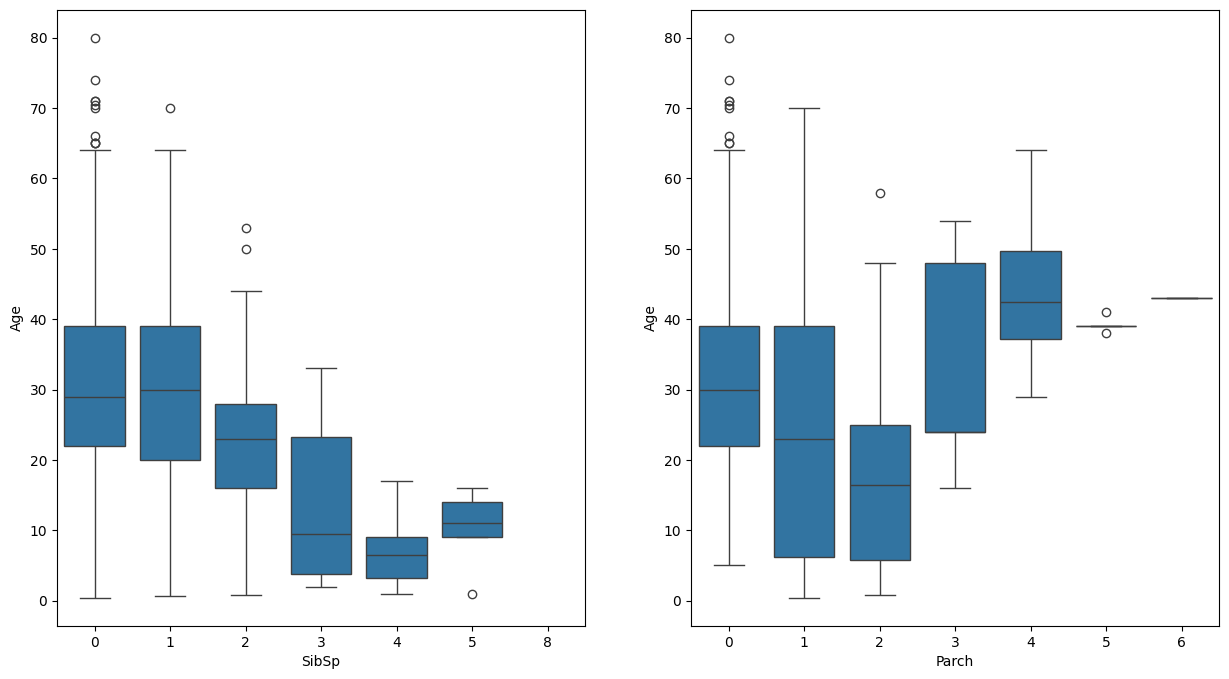

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.boxplot(data=df, x="SibSp", y="Age", ax=ax[0])
sns.boxplot(data=df, x="Parch", y="Age", ax=ax[1])

In [93]:
ps = df.loc[df[df["Parch"]==0]["Age"].sort_values().iloc[:3].index]

In [95]:
ps["Ticket"]

777    364516
731      2699
125      2651
Name: Ticket, dtype: object

In [97]:
df[df["Ticket"].isin(ps["Ticket"])].sort_values("Ticket")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S


In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Embarked vs. Fare

In [100]:
# df.groupby("Ticket").Fare.("mean")

SyntaxError: invalid syntax (1637209613.py, line 1)

(0.0, 90.0)

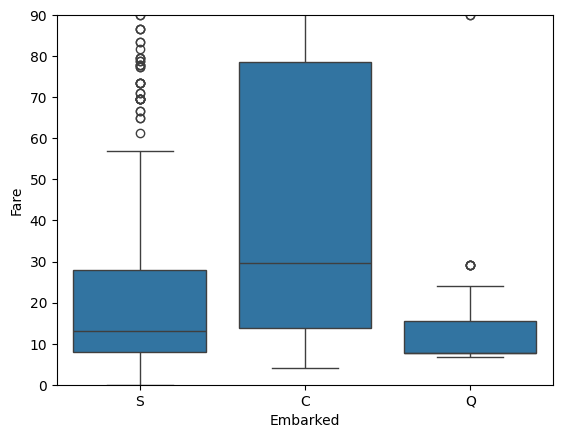

In [99]:
sns.boxplot(data=df, x="Embarked", y="Fare")
plt.ylim(0, 90)

In [ ]:
for e  in df["Embarked"].unique():
    plt.hist(df[df["Embarked"] == e])